In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
police_data = pd.read_csv(r'C:\DA12\capstone\capstone-da12\data\police calls for service data\Metro_Nashville_Police_Department_Incidents.csv', low_memory=False)
police_data.head()

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported
0,-9.655185e+06,4.329418e+06,1,20190522445_11,20190522445,D,DISPATCHED,U,UNFOUNDED,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37216.0,17,2019/07/12 13:00:00+00,2019/07/12 19:04:00+00
1,-9.646057e+06,4.322660e+06,2,20190526626_11,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37214.0,09,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
2,-9.646057e+06,4.322660e+06,3,20190526626_21,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37214.0,17,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
3,-9.666985e+06,4.318524e+06,4,20190528995_11,20190528995,D,DISPATCHED,O,OPEN,Open,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,2019/07/15 17:30:00+00,2019/07/15 18:47:00+00
4,-9.666985e+06,4.326797e+06,5,20190528693_11,20190528693,D,DISPATCHED,O,OPEN,Open,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/15 14:20:00+00,2019/07/15 16:13:00+00


In [3]:
# error when loading dataframe: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
# did some googling, decided to use low_memory=False
# opened file in excel, all values are empty and all values are NaN on pandas?

In [4]:
police_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944481 entries, 0 to 944480
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   X                            925268 non-null  float64
 1   Y                            925268 non-null  float64
 2   OBJECTID                     944481 non-null  int64  
 3   Primary_Key                  944481 non-null  object 
 4   Incident_Number              944481 non-null  int64  
 5   Report_Type                  944380 non-null  object 
 6   Report_Type_Description      879532 non-null  object 
 7   Incident_Status_Code         944461 non-null  object 
 8   Incident_Status_Description  944386 non-null  object 
 9   Investigation_Status         944481 non-null  object 
 10  Incident_Location            938652 non-null  object 
 11  Latitude                     925268 non-null  float64
 12  Longitude                    925268 non-null  float64
 13 

rates.columns = rates.columns.str.replace(' ', '')
rates

In [6]:
police_data['ZIP_Code'] = police_data['ZIP_Code'].str.replace('.','')
police_data['ZIP_Code']

0         372160
1         372140
2         372140
3            NaN
4            NaN
           ...  
944476    372010
944477       NaN
944478       NaN
944479       NaN
944480    370760
Name: ZIP_Code, Length: 944481, dtype: object

police_data['ZIP_Code'] = police_data['ZIP_Code'].astype(float)
police_data['ZIP_Code']

In [8]:
police_data.columns


Index(['X', 'Y', 'OBJECTID', 'Primary_Key', 'Incident_Number', 'Report_Type',
       'Report_Type_Description', 'Incident_Status_Code',
       'Incident_Status_Description', 'Investigation_Status',
       'Incident_Location', 'Latitude', 'Longitude', 'RPA', 'Zone',
       'Location_Code', 'Location_Description', 'Offense_Number',
       'Offense_NIBRS', 'Offense_Description', 'Weapon_Description',
       'Victim_Number', 'Domestic_Related', 'Victim_Type',
       'Victim_Description', 'Victim_Gender', 'Victim_Race',
       'Victim_Ethnicity', 'Victim_County_Resident', 'Mapped_Location',
       'POINT_X', 'POINT_Y', 'ZIP_Code', 'Weapon_Primary', 'Incident_Occurred',
       'Incident_Reported'],
      dtype='object')

In [9]:
police_data['POINT_Y']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
944476   NaN
944477   NaN
944478   NaN
944479   NaN
944480   NaN
Name: POINT_Y, Length: 944481, dtype: float64

In [10]:
# find area that has the most calls

In [11]:
police_data['Location_Code']

0          5.0
1         22.0
2         22.0
3          8.0
4         22.0
          ... 
944476     3.0
944477    90.0
944478    20.0
944479    22.0
944480    22.0
Name: Location_Code, Length: 944481, dtype: float64

In [12]:
police_data['Location_Code'].value_counts()

Location_Code
22.0    285190
20.0    179864
13.0    124499
90.0    110940
8.0      25146
         ...  
83.0        35
79.0        25
47.0        18
49.0        13
56.0         1
Name: count, Length: 62, dtype: int64

In [13]:
# Location Code 22 shows up the most

In [14]:
police_data.loc[police_data['Location_Code'] == 22]

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported
1,-9.646057e+06,4.322660e+06,2,20190526626_11,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,09,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
2,-9.646057e+06,4.322660e+06,3,20190526626_21,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,17,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
4,-9.666985e+06,4.326797e+06,5,20190528693_11,20190528693,D,DISPATCHED,O,OPEN,Open,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/15 14:20:00+00,2019/07/15 16:13:00+00
15,-9.652513e+06,4.326797e+06,16,20190508753_11,20190508753,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/06 19:25:00+00,2019/07/06 19:58:00+00
20,-9.661419e+06,4.318524e+06,21,20190528665_11,20190528665,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/15 14:14:00+00,2019/07/15 16:20:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944454,-9.658636e+06,4.323763e+06,944455,20240476501_11,20240476501,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,NaN,2024/07/19 03:50:00+00,2024/07/19 04:36:00+00
944465,-9.641381e+06,4.314390e+06,944466,20240470448_11,20240470448,O,NaN,O,OPEN,Open,...,U,Unknown,NON RESIDENT,NaN,NaN,NaN,NaN,17,2024/05/14 05:01:00+00,2024/07/16 23:01:00+00
944467,-9.664758e+06,4.322660e+06,944468,20240493835_11,20240493835,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,01,2024/07/26 21:23:00+00,2024/07/27 03:23:00+00
944479,-9.652513e+06,4.310258e+06,944480,20240505615_11,20240505615,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2024/08/01 04:13:00+00,2024/08/01 05:04:00+00


In [15]:
# Maybe try zipcode instead?

In [16]:
police_data['ZIP_Code']

0         372160
1         372140
2         372140
3            NaN
4            NaN
           ...  
944476    372010
944477       NaN
944478       NaN
944479       NaN
944480    370760
Name: ZIP_Code, Length: 944481, dtype: object

In [17]:
police_data['ZIP_Code'].value_counts()

ZIP_Code
372070    50263
370130    47252
372110    45841
371150    40530
372030    29798
          ...  
371850        1
373300        1
370780        1
372740        1
370570        1
Name: count, Length: 130, dtype: int64

In [18]:
# 37207 has the most incident reports -- MY zipcode!

In [19]:
# Make a chart with this zipcode and the years the reports occurred? 

In [20]:
police_data['Incident_Reported'] = pd.to_datetime(police_data['Incident_Reported'])

In [21]:
police_data['Incident_Occurred'] = pd.to_datetime(police_data['Incident_Occurred'])

In [22]:
police_data['year'] = police_data['Incident_Occurred'].dt.year
police_data

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
0,-9.655185e+06,4.329418e+06,1,20190522445_11,20190522445,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372160,17,2019-07-12 13:00:00+00:00,2019-07-12 19:04:00+00:00,2019
1,-9.646057e+06,4.322660e+06,2,20190526626_11,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,09,2019-07-14 16:00:00+00:00,2019-07-14 18:55:00+00:00,2019
2,-9.646057e+06,4.322660e+06,3,20190526626_21,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,17,2019-07-14 16:00:00+00:00,2019-07-14 18:55:00+00:00,2019
3,-9.666985e+06,4.318524e+06,4,20190528995_11,20190528995,D,DISPATCHED,O,OPEN,Open,...,NaN,NaN,NaN,NaN,NaN,NaN,17,2019-07-15 17:30:00+00:00,2019-07-15 18:47:00+00:00,2019
4,-9.666985e+06,4.326797e+06,5,20190528693_11,20190528693,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019-07-15 14:20:00+00:00,2019-07-15 16:13:00+00:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944476,-9.659971e+06,4.322797e+06,944477,20240496858_22,20240496858,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,372010,17,2024-07-28 09:49:00+00:00,2024-07-28 11:58:00+00:00,2024
944477,-9.640268e+06,4.324038e+06,944478,20240497877_11,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944478,-9.640268e+06,4.324038e+06,944479,20240497877_21,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944479,-9.652513e+06,4.310258e+06,944480,20240505615_11,20240505615,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2024-08-01 04:13:00+00:00,2024-08-01 05:04:00+00:00,2024


In [23]:
police_data = police_data[police_data['year'].isin([2020,2021,2022,2023,2024])]
police_data

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128010,-9.657634e+06,4.323900e+06,128011,20220026223_11,20220026223,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2022-01-19 06:00:00+00:00,2022-01-19 06:44:00+00:00,2022
128016,-9.671437e+06,4.314390e+06,128017,20200456555_11,20200456555,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,16,2020-07-11 05:01:00+00:00,2020-07-11 16:09:00+00:00,2020
128017,-9.653626e+06,4.335076e+06,128018,20200464297_11,20200464297,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2020-07-15 17:30:00+00:00,2020-07-15 18:02:00+00:00,2020
128018,-9.668320e+06,4.328728e+06,128019,20200465547_11,20200465547,S,SUSPECT,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372180,17,2020-07-15 06:00:00+00:00,2020-07-16 10:28:00+00:00,2020
128019,-9.656855e+06,4.316732e+06,128020,20200587978_11,20200587978,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,372110,17,2020-09-13 02:56:00+00:00,2020-09-13 03:15:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944476,-9.659971e+06,4.322797e+06,944477,20240496858_22,20240496858,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,372010,17,2024-07-28 09:49:00+00:00,2024-07-28 11:58:00+00:00,2024
944477,-9.640268e+06,4.324038e+06,944478,20240497877_11,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944478,-9.640268e+06,4.324038e+06,944479,20240497877_21,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944479,-9.652513e+06,4.310258e+06,944480,20240505615_11,20240505615,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2024-08-01 04:13:00+00:00,2024-08-01 05:04:00+00:00,2024


In [24]:
most_incidents = police_data[police_data['ZIP_Code'] == '37207']
most_incidents

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818896,-9.658747e+06,4.328452e+06,818897,20220420357_11,20220420357,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-24 03:50:00+00:00,2022-08-24 05:31:00+00:00,2022
818922,-9.659749e+06,4.334662e+06,818923,20220425733_11,20220425733,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2022-08-26 18:20:00+00:00,2022-08-26 18:20:00+00:00,2022
819012,-9.658970e+06,4.325004e+06,819013,20220402037_11,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819015,-9.658970e+06,4.325004e+06,819016,20220402037_12,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819024,-9.657188e+06,4.329418e+06,819025,20220403065_11,20220403065,T,NaN,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-13 17:00:00+00:00,2022-08-15 15:56:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835943,-9.661864e+06,4.330797e+06,835944,20230677855_11,20230677855,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2023-11-12 23:21:00+00:00,2023-11-13 00:17:00+00:00,2023
835954,-9.657745e+06,4.334524e+06,835955,20240253816_11,20240253816,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-04-15 02:57:00+00:00,2024-04-15 20:40:00+00:00,2024
835958,-9.657745e+06,4.334662e+06,835959,20240246330_11,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024
835959,-9.657745e+06,4.334662e+06,835960,20240246330_12,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024


In [25]:
most_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, 818896 to 835993
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   X                            770 non-null    float64            
 1   Y                            770 non-null    float64            
 2   OBJECTID                     807 non-null    int64              
 3   Primary_Key                  807 non-null    object             
 4   Incident_Number              807 non-null    int64              
 5   Report_Type                  807 non-null    object             
 6   Report_Type_Description      795 non-null    object             
 7   Incident_Status_Code         807 non-null    object             
 8   Incident_Status_Description  807 non-null    object             
 9   Investigation_Status         807 non-null    object             
 10  Incident_Location            807 non-null    ob

In [26]:
police_data[police_data['ZIP_Code'] == '37207']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818896,-9.658747e+06,4.328452e+06,818897,20220420357_11,20220420357,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-24 03:50:00+00:00,2022-08-24 05:31:00+00:00,2022
818922,-9.659749e+06,4.334662e+06,818923,20220425733_11,20220425733,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2022-08-26 18:20:00+00:00,2022-08-26 18:20:00+00:00,2022
819012,-9.658970e+06,4.325004e+06,819013,20220402037_11,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819015,-9.658970e+06,4.325004e+06,819016,20220402037_12,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819024,-9.657188e+06,4.329418e+06,819025,20220403065_11,20220403065,T,NaN,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-13 17:00:00+00:00,2022-08-15 15:56:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835943,-9.661864e+06,4.330797e+06,835944,20230677855_11,20230677855,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2023-11-12 23:21:00+00:00,2023-11-13 00:17:00+00:00,2023
835954,-9.657745e+06,4.334524e+06,835955,20240253816_11,20240253816,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-04-15 02:57:00+00:00,2024-04-15 20:40:00+00:00,2024
835958,-9.657745e+06,4.334662e+06,835959,20240246330_11,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024
835959,-9.657745e+06,4.334662e+06,835960,20240246330_12,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024


In [27]:
police_data['Incident_Reported']

128010   2022-01-19 06:44:00+00:00
128016   2020-07-11 16:09:00+00:00
128017   2020-07-15 18:02:00+00:00
128018   2020-07-16 10:28:00+00:00
128019   2020-09-13 03:15:00+00:00
                    ...           
944476   2024-07-28 11:58:00+00:00
944477   2024-07-29 05:16:00+00:00
944478   2024-07-29 05:16:00+00:00
944479   2024-08-01 05:04:00+00:00
944480   2024-08-01 02:57:00+00:00
Name: Incident_Reported, Length: 576643, dtype: datetime64[ns, UTC]

In [28]:
most_incidents['Incident_Reported'].count()

807

In [29]:
most_incidents

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818896,-9.658747e+06,4.328452e+06,818897,20220420357_11,20220420357,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-24 03:50:00+00:00,2022-08-24 05:31:00+00:00,2022
818922,-9.659749e+06,4.334662e+06,818923,20220425733_11,20220425733,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2022-08-26 18:20:00+00:00,2022-08-26 18:20:00+00:00,2022
819012,-9.658970e+06,4.325004e+06,819013,20220402037_11,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819015,-9.658970e+06,4.325004e+06,819016,20220402037_12,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819024,-9.657188e+06,4.329418e+06,819025,20220403065_11,20220403065,T,NaN,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-13 17:00:00+00:00,2022-08-15 15:56:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835943,-9.661864e+06,4.330797e+06,835944,20230677855_11,20230677855,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2023-11-12 23:21:00+00:00,2023-11-13 00:17:00+00:00,2023
835954,-9.657745e+06,4.334524e+06,835955,20240253816_11,20240253816,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-04-15 02:57:00+00:00,2024-04-15 20:40:00+00:00,2024
835958,-9.657745e+06,4.334662e+06,835959,20240246330_11,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024
835959,-9.657745e+06,4.334662e+06,835960,20240246330_12,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024


In [30]:
most_incidents.reset_index()

,index,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
0,818896,-9.658747e+06,4.328452e+06,818897,20220420357_11,20220420357,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-24 03:50:00+00:00,2022-08-24 05:31:00+00:00,2022
1,818922,-9.659749e+06,4.334662e+06,818923,20220425733_11,20220425733,D,DISPATCHED,R,REFUSED TO COOPERATE,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2022-08-26 18:20:00+00:00,2022-08-26 18:20:00+00:00,2022
2,819012,-9.658970e+06,4.325004e+06,819013,20220402037_11,20220402037,S,SUSPECT,U,UNFOUNDED,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
3,819015,-9.658970e+06,4.325004e+06,819016,20220402037_12,20220402037,S,SUSPECT,U,UNFOUNDED,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
4,819024,-9.657188e+06,4.329418e+06,819025,20220403065_11,20220403065,T,NaN,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-13 17:00:00+00:00,2022-08-15 15:56:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,835943,-9.661864e+06,4.330797e+06,835944,20230677855_11,20230677855,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2023-11-12 23:21:00+00:00,2023-11-13 00:17:00+00:00,2023
803,835954,-9.657745e+06,4.334524e+06,835955,20240253816_11,20240253816,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-04-15 02:57:00+00:00,2024-04-15 20:40:00+00:00,2024
804,835958,-9.657745e+06,4.334662e+06,835959,20240246330_11,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024
805,835959,-9.657745e+06,4.334662e+06,835960,20240246330_12,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024


In [31]:
most_incidents['year'] = most_incidents['Incident_Occurred'].dt.year
most_incidents.reset_index()

C:\Users\erica\AppData\Local\Temp\ipykernel_11020\701570977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_incidents['year'] = most_incidents['Incident_Occurred'].dt.year


,index,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
0,818896,-9.658747e+06,4.328452e+06,818897,20220420357_11,20220420357,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-24 03:50:00+00:00,2022-08-24 05:31:00+00:00,2022
1,818922,-9.659749e+06,4.334662e+06,818923,20220425733_11,20220425733,D,DISPATCHED,R,REFUSED TO COOPERATE,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2022-08-26 18:20:00+00:00,2022-08-26 18:20:00+00:00,2022
2,819012,-9.658970e+06,4.325004e+06,819013,20220402037_11,20220402037,S,SUSPECT,U,UNFOUNDED,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
3,819015,-9.658970e+06,4.325004e+06,819016,20220402037_12,20220402037,S,SUSPECT,U,UNFOUNDED,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
4,819024,-9.657188e+06,4.329418e+06,819025,20220403065_11,20220403065,T,NaN,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-13 17:00:00+00:00,2022-08-15 15:56:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,835943,-9.661864e+06,4.330797e+06,835944,20230677855_11,20230677855,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2023-11-12 23:21:00+00:00,2023-11-13 00:17:00+00:00,2023
803,835954,-9.657745e+06,4.334524e+06,835955,20240253816_11,20240253816,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-04-15 02:57:00+00:00,2024-04-15 20:40:00+00:00,2024
804,835958,-9.657745e+06,4.334662e+06,835959,20240246330_11,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024
805,835959,-9.657745e+06,4.334662e+06,835960,20240246330_12,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024


In [32]:
most_incidents['Incident_Reported'].value_counts()


Incident_Reported
2024-05-28 15:46:00+00:00    6
2023-11-13 16:16:00+00:00    6
2024-06-01 05:16:00+00:00    5
2023-10-28 01:57:00+00:00    5
2023-10-13 01:30:00+00:00    5
                            ..
2024-03-23 23:10:00+00:00    1
2023-10-22 21:33:00+00:00    1
2024-08-24 03:31:00+00:00    1
2023-12-06 00:31:00+00:00    1
2023-11-15 16:04:00+00:00    1
Name: count, Length: 669, dtype: int64

In [33]:
count37207 = most_incidents['year'].value_counts()
count37207

year
2024    332
2023    325
2022    149
2021      1
Name: count, dtype: int64

In [34]:
most_incidents

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818896,-9.658747e+06,4.328452e+06,818897,20220420357_11,20220420357,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-24 03:50:00+00:00,2022-08-24 05:31:00+00:00,2022
818922,-9.659749e+06,4.334662e+06,818923,20220425733_11,20220425733,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2022-08-26 18:20:00+00:00,2022-08-26 18:20:00+00:00,2022
819012,-9.658970e+06,4.325004e+06,819013,20220402037_11,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819015,-9.658970e+06,4.325004e+06,819016,20220402037_12,20220402037,S,SUSPECT,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2022-08-15 01:27:00+00:00,2022-08-15 01:57:00+00:00,2022
819024,-9.657188e+06,4.329418e+06,819025,20220403065_11,20220403065,T,NaN,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2022-08-13 17:00:00+00:00,2022-08-15 15:56:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835943,-9.661864e+06,4.330797e+06,835944,20230677855_11,20230677855,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2023-11-12 23:21:00+00:00,2023-11-13 00:17:00+00:00,2023
835954,-9.657745e+06,4.334524e+06,835955,20240253816_11,20240253816,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-04-15 02:57:00+00:00,2024-04-15 20:40:00+00:00,2024
835958,-9.657745e+06,4.334662e+06,835959,20240246330_11,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024
835959,-9.657745e+06,4.334662e+06,835960,20240246330_12,20240246330,D,DISPATCHED,P,PROSECUTION DECLINED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-04-12 00:30:00+00:00,2024-04-12 04:12:00+00:00,2024


In [35]:
count37207.reset_index()

,year,count
0,2024,332
1,2023,325
2,2022,149
3,2021,1


In [36]:
count37207.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, 2024 to 2021
Series name: count
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


In [37]:
# count of number of incidents in 37207 within the data

<Axes: xlabel='year'>

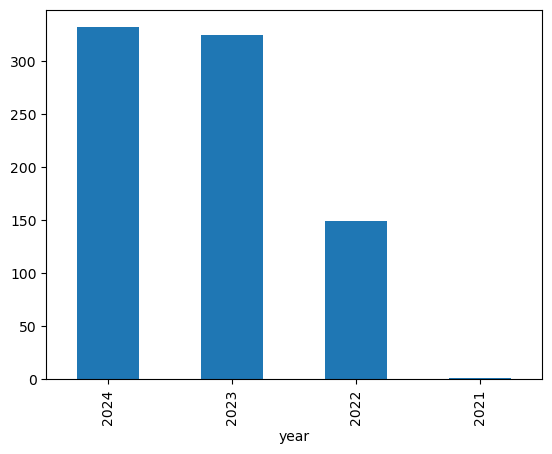

In [38]:
count37207.plot.bar( x='year', y='count')

In [39]:
police_data[police_data['ZIP_Code'] == '37013']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818836,-9.648840e+06,4.310808e+06,818837,20220414402_11,20220414402,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37013,17,2022-08-21 02:30:00+00:00,2022-08-21 06:01:00+00:00,2022
818845,NaN,NaN,818846,20220333309_11,20220333309,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37013,17,2022-07-06 04:04:00+00:00,2022-07-08 02:50:00+00:00,2022
818870,-9.652513e+06,4.303649e+06,818871,20220415404_11,20220415404,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2022-08-21 17:00:00+00:00,2022-08-21 21:44:00+00:00,2022
818958,-9.643941e+06,4.306264e+06,818959,20220374473_11,20220374473,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2022-07-30 03:00:00+00:00,2022-07-30 13:21:00+00:00,2022
818962,-9.646724e+06,4.307641e+06,818963,20220310969_11,20220310969,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2022-06-24 17:00:00+00:00,2022-06-25 04:30:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835850,-9.645055e+06,4.308192e+06,835851,20230698594_11,20230698594,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,06,2023-11-22 02:32:00+00:00,2023-11-22 03:22:00+00:00,2023
835857,-9.645055e+06,4.308192e+06,835858,20230698594_12,20230698594,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37013,06,2023-11-22 02:32:00+00:00,2023-11-22 03:22:00+00:00,2023
835947,-9.638264e+06,4.310533e+06,835948,20230687456_11,20230687456,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37013,17,2023-10-30 13:00:00+00:00,2023-11-16 20:15:00+00:00,2023
835966,-9.643941e+06,4.306264e+06,835967,20240259081_11,20240259081,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,09,2024-04-17 18:21:00+00:00,2024-04-17 21:45:00+00:00,2024


In [40]:
police_data[police_data['ZIP_Code'] == '37206']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818429,-9.654405e+06,4.327210e+06,818430,20220412152_11,20220412152,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,01,2022-08-19 18:45:00+00:00,2022-08-19 19:50:00+00:00,2022
818433,-9.654405e+06,4.327210e+06,818434,20220412152_22,20220412152,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,01,2022-08-19 18:45:00+00:00,2022-08-19 19:50:00+00:00,2022
818877,-9.658190e+06,4.323349e+06,818878,20220365998_11,20220365998,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2022-06-01 05:01:00+00:00,2022-07-26 00:11:00+00:00,2022
818880,-9.657968e+06,4.323625e+06,818881,20220418888_11,20220418888,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,09,2022-08-23 02:00:00+00:00,2022-08-23 15:41:00+00:00,2022
818882,-9.657968e+06,4.323625e+06,818883,20220418888_22,20220418888,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,01S,2022-08-23 02:00:00+00:00,2022-08-23 15:41:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835497,-9.655407e+06,4.324176e+06,835498,20230628967_22,20230628967,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,01S,2023-10-22 12:07:00+00:00,2023-10-23 15:12:00+00:00,2023
835575,-9.658302e+06,4.323625e+06,835576,20240075263_11,20240075263,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-02-03 21:30:00+00:00,2024-02-04 00:51:00+00:00,2024
835586,-9.656521e+06,4.326245e+06,835587,20240075393_11,20240075393,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-02-04 01:48:00+00:00,2024-02-04 04:00:00+00:00,2024
835634,-9.657745e+06,4.323763e+06,835635,20240134706_11,20240134706,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-02-27 01:01:00+00:00,2024-02-27 01:50:00+00:00,2024


In [41]:
police_data

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128010,-9.657634e+06,4.323900e+06,128011,20220026223_11,20220026223,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2022-01-19 06:00:00+00:00,2022-01-19 06:44:00+00:00,2022
128016,-9.671437e+06,4.314390e+06,128017,20200456555_11,20200456555,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,16,2020-07-11 05:01:00+00:00,2020-07-11 16:09:00+00:00,2020
128017,-9.653626e+06,4.335076e+06,128018,20200464297_11,20200464297,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2020-07-15 17:30:00+00:00,2020-07-15 18:02:00+00:00,2020
128018,-9.668320e+06,4.328728e+06,128019,20200465547_11,20200465547,S,SUSPECT,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372180,17,2020-07-15 06:00:00+00:00,2020-07-16 10:28:00+00:00,2020
128019,-9.656855e+06,4.316732e+06,128020,20200587978_11,20200587978,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,372110,17,2020-09-13 02:56:00+00:00,2020-09-13 03:15:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944476,-9.659971e+06,4.322797e+06,944477,20240496858_22,20240496858,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,372010,17,2024-07-28 09:49:00+00:00,2024-07-28 11:58:00+00:00,2024
944477,-9.640268e+06,4.324038e+06,944478,20240497877_11,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944478,-9.640268e+06,4.324038e+06,944479,20240497877_21,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944479,-9.652513e+06,4.310258e+06,944480,20240505615_11,20240505615,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2024-08-01 04:13:00+00:00,2024-08-01 05:04:00+00:00,2024


In [42]:
zip_code_nan_count = police_data['ZIP_Code'].isna().sum()
zip_code_nan_count

282784

In [43]:
nan_count = police_data.isna().sum()
nan_count

X                               15000
Y                               15000
OBJECTID                            0
Primary_Key                         0
Incident_Number                     0
Report_Type                        97
Report_Type_Description         43728
Incident_Status_Code               19
Incident_Status_Description        94
Investigation_Status                0
Incident_Location                4843
Latitude                        15000
Longitude                       15000
RPA                            338247
Zone                           338247
Location_Code                      34
Location_Description               34
Offense_Number                    120
Offense_NIBRS                      32
Offense_Description                 0
Weapon_Description              21288
Victim_Number                       0
Domestic_Related                    0
Victim_Type                         8
Victim_Description                 91
Victim_Gender                  128225
Victim_Race 

In [44]:
police_data['ZIP_Code'].unique().tolist()

['372060',
 nan,
 '372180',
 '372110',
 '372070',
 '372100',
 '372150',
 '371150',
 '372170',
 '370800',
 '372030',
 '372050',
 '372090',
 '372120',
 '370760',
 '372280',
 '370130',
 '372080',
 '372140',
 '372160',
 '372010',
 '372040',
 '372210',
 '372190',
 '370720',
 '371380',
 '372130',
 '371890',
 '370270',
 '372200',
 '372400',
 '371350',
 '371100',
 '370150',
 '372320',
 '152130',
 '371220',
 '371430',
 '370750',
 '434400',
 '392020',
 '370660',
 '370860',
 '370640',
 '370430',
 '900690',
 '191530',
 '371290',
 '370290',
 '00',
 '370870',
 '376830',
 '370280',
 '37010',
 '277070',
 '371300',
 '371670',
 '67060',
 '272160',
 '895020',
 '385620',
 '301390',
 '371850',
 '370820',
 '911070',
 '373300',
 '370780',
 '372740',
 '303180',
 '328010',
 '37201',
 '37138',
 '37213',
 '37206',
 '37209',
 '37211',
 '37013',
 '37221',
 '37115',
 '37219',
 '37217',
 '37208',
 '37207',
 '37210',
 '37203',
 '37076',
 '37214',
 '37205',
 '37218',
 '37212',
 '37204',
 '37228',
 '37216',
 '37240',
 

In [45]:
# lots of nan values